In [1]:
# Memanggil Library

In [2]:
import pandas as pd
import numpy as np

#library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#library untuk analisis time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#library yang digunakan untuk forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [3]:
df = pd.read_excel('data_olah.xlsx')

In [4]:
df.head()

,Date,Jumlah
0,2019-05-01,27
1,2019-06-01,28
2,2019-07-01,27
3,2019-08-01,27
4,2019-09-01,30


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

In [6]:
df.set_index(['Date'], inplace=True)

In [7]:
df.head()

,Jumlah
Date,
2019-05-01,27
2019-06-01,28
2019-07-01,27
2019-08-01,27
2019-09-01,30


In [8]:
df.index.min(), df.index.max()

(Timestamp('2019-05-01 00:00:00'), Timestamp('2024-03-01 00:00:00'))

In [9]:
if (df.index.max() - df.index.min() == 58):
    print ('Data is Continous')

In [10]:
df.index.freq = 'MS'

In [11]:
# Analisa Time Series

<AxesSubplot:xlabel='Date'>

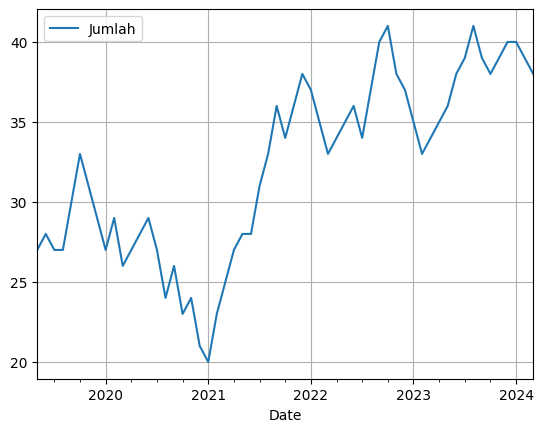

In [12]:
df.plot(grid=True)

In [13]:
train_df = df.loc[:'2023-07-01']
test_df = df.loc['2023-08-01':]

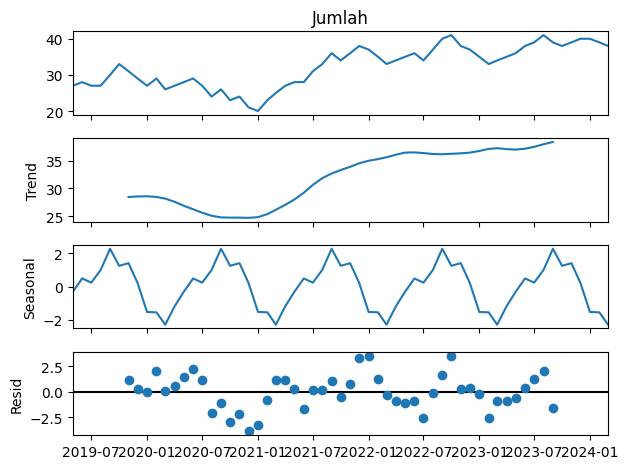

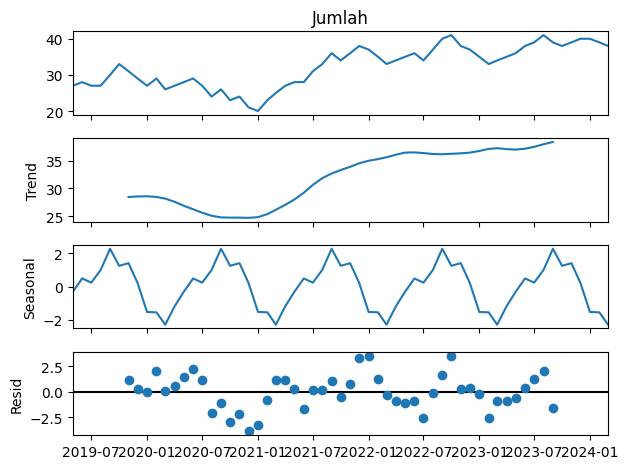

In [14]:
decompose_add = seasonal_decompose(df['Jumlah'])
decompose_add.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

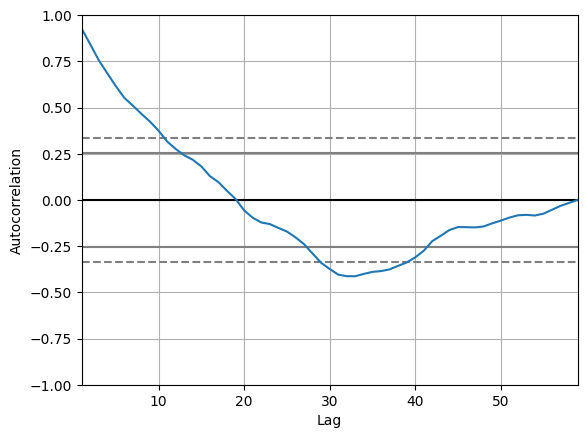

In [15]:
pd.plotting.autocorrelation_plot(df["Jumlah"])

In [16]:
def adf_test(timeseries):
    print ('Hasil testing Dickey-Fuller')
    print ('--------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test statistic','p-value','Lags Used','Number of Observation Used'])
    for key, Value in adftest[4].items() :
        adf_output['Critical Value (%s)' %key] = Value
    print (adf_output)
    
adf_test(df.values)

Hasil testing Dickey-Fuller
--------------------------------
Test statistic                -1.245975
p-value                        0.653513
Lags Used                      0.000000
Number of Observation Used    58.000000
Critical Value (1%)           -3.548494
Critical Value (5%)           -2.912837
Critical Value (10%)          -2.594129
dtype: float64


In [17]:
diff_df = df.diff()
diff_df.head()

,Jumlah
Date,
2019-05-01,NaN
2019-06-01,1.0
2019-07-01,-1.0
2019-08-01,0.0
2019-09-01,3.0


In [18]:
diff_df.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

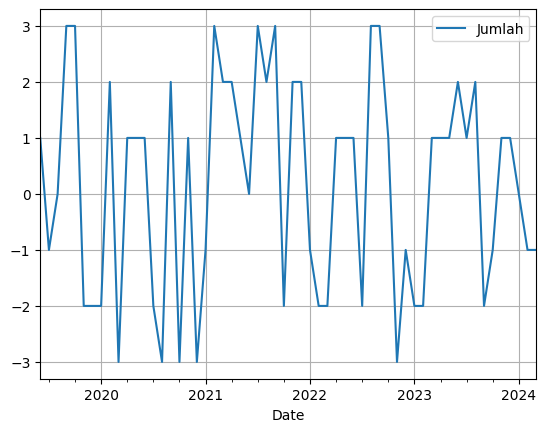

In [19]:
diff_df.plot(grid=True)

In [20]:
adf_test(diff_df)

Hasil testing Dickey-Fuller
--------------------------------
Test statistic               -6.723485e+00
p-value                       3.435927e-09
Lags Used                     0.000000e+00
Number of Observation Used    5.700000e+01
Critical Value (1%)          -3.550670e+00
Critical Value (5%)          -2.913766e+00
Critical Value (10%)         -2.594624e+00
dtype: float64


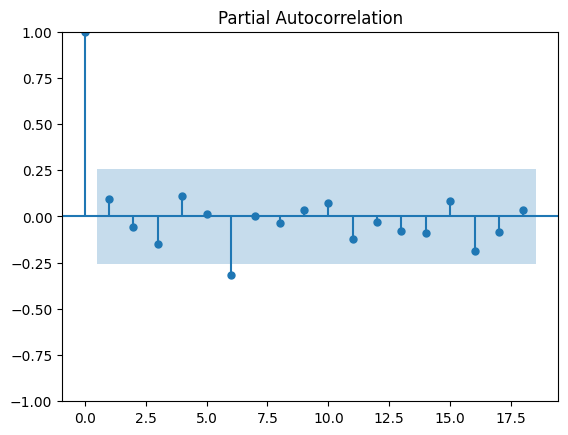

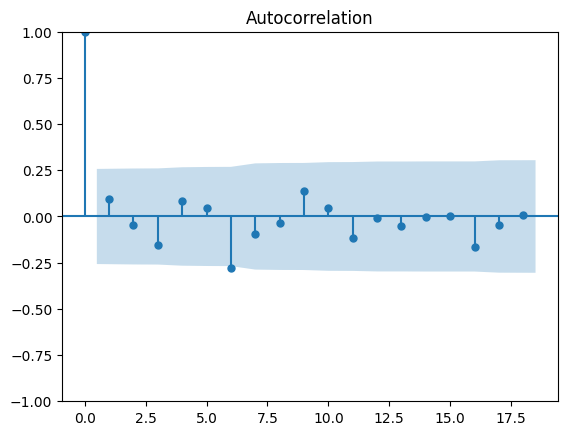

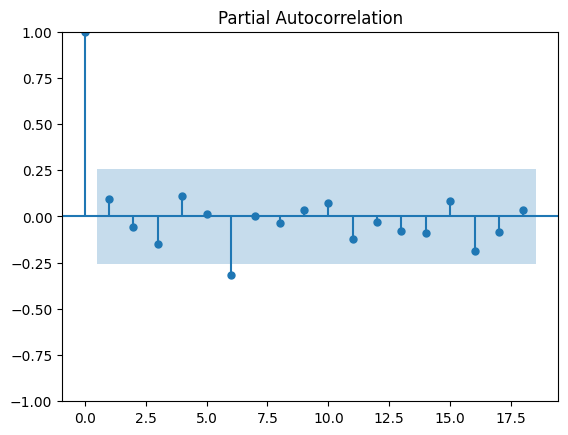

In [21]:
plot_acf(diff_df)
plot_pacf(diff_df)

In [22]:
# Algoritma Time Series

In [23]:
# Double Exponential Smoothing

In [24]:
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=10, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(8)

<AxesSubplot:xlabel='Date'>

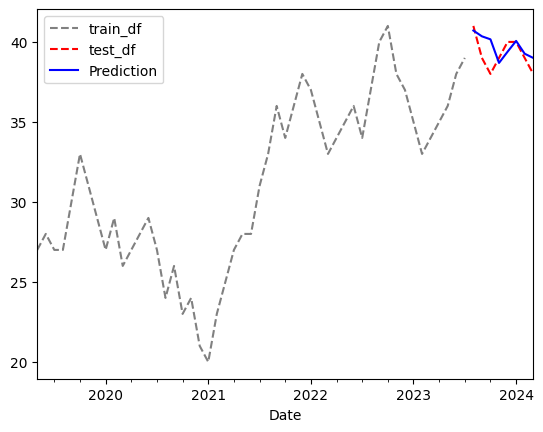

In [25]:
train_df['Jumlah'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['Jumlah'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [26]:
print('Train RMSE :', mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Test RMSE :',mean_squared_error(test_df, double_exp_test_pred)**0.5)
print('Train MAPE :',mean_absolute_percentage_error(train_df, double_exp_train_pred))
print('Test MAPE :',mean_absolute_percentage_error(test_df, double_exp_test_pred))

Train RMSE : 1.9619015998724978
Test RMSE : 1.0079178669501514
Train MAPE : 0.05632601452484126
Test MAPE : 0.019558731629807855


In [27]:
ar = ARIMA(train_df, order=(1,1,5)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(8)

In [28]:
# Arima

<AxesSubplot:xlabel='Date'>

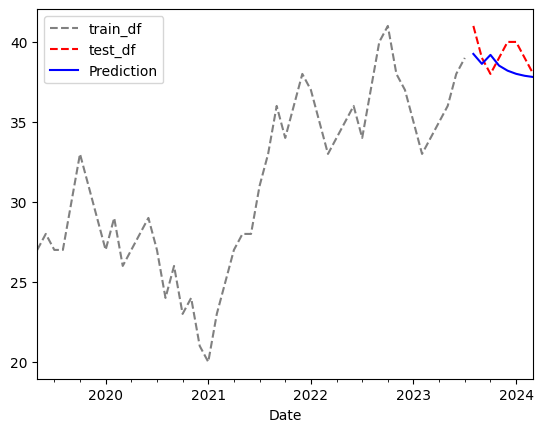

In [29]:
train_df['Jumlah'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['Jumlah'].plot(style='--', color='r', legend=True, label='test_df')
ar_test_pred.plot(color='b', legend=True, label='Prediction')

In [30]:
print('Train RMSE :', mean_squared_error(train_df, ar_train_pred)**0.5)
print('Test RMSE :', mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train MAPE :', mean_absolute_percentage_error(train_df, ar_train_pred))
print('Test MAPE :', mean_absolute_percentage_error(test_df, ar_test_pred))

Train RMSE : 4.214732400756224
Test RMSE : 1.290971300480403
Train MAPE : 0.07422551088733634
Test MAPE : 0.02803509107677173


In [31]:
# Perbandingan Algoritma

In [32]:
comparision_df = pd.DataFrame(data=[
    ['Double Exp Smoothing', 1.0079178669501514, 0.019558731629807855],
    ['ARIMA', 1.290971300480403, 0.02803509107677173]
    ],
    columns=['Model', 'RMSE', 'MAPE'])
comparision_df.set_index('Model', inplace=True)

In [33]:
comparision_df.sort_values(by='RMSE')

,RMSE,MAPE
Model,,
Double Exp Smoothing,1.007918,0.019559
ARIMA,1.290971,0.028035


In [34]:
double_exp = ExponentialSmoothing(df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=10, damped_trend=False).fit()
double_exp_pred = double_exp.forecast(6)

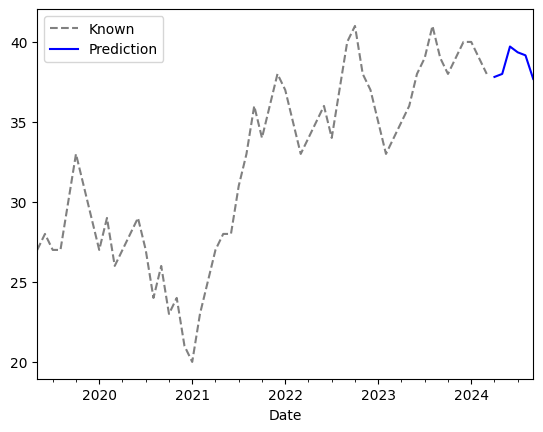

In [35]:
df['Jumlah'].plot(style='--', color='gray', legend=True, label='Known')
double_exp_pred.plot(color='b', legend=True, label='Prediction')
plt.show()

In [36]:
import pickle

In [37]:
pickle.dump(double_exp, open('prediksi_jual.sav','wb'))